In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans

In [11]:
random.seed(42)

In [12]:
warnings.filterwarnings('ignore')

In [13]:
class M1:
    def __init__(self, nodes: int, lr: float = 0.01) -> None:
        self.lr: float = lr
        self.nodes: int = nodes

    def _calc(self, x: np.array, center: np.array, std: float) -> float:
        return np.exp(- np.linalg.norm(x - center) ** 2 / ( 2 * std ** 2))

    def _initialise_weights(self) -> None:
        self.weights: np.array = np.array([random.uniform(-1, 1) for _ in range(self.nodes)])

    def initialise_centers(self, centers: np.array) -> None:
        self.centers: np.array = centers.astype(np.float64)
    
    def initialise_std(self, df: pd.DataFrame, min_points: int = 2) -> None:
        # min_points -> p
        std = []
        for i in range(self.nodes):
            pts: list[float] = []
            for j in range(len(df)):
                if np.array_equal(self.centers[i], np.array(df.iloc[j])):
                    continue
                temp = self.centers[i] - np.array(df.iloc[j])
                pts.append(np.dot(temp.T, temp))
            
            pts.sort()
            add: float = np.sum(pts[: min_points])
            std.append(np.sqrt(add / min_points))
        self.std = np.array(std)

    def fit(self, X: pd.DataFrame, Y: pd.DataFrame, epochs = 100) -> None:
        self._initialise_weights()

        for epoch in range(epochs):
            for i, x in enumerate(X):
                curr: np.array = np.array(X.iloc[i])
                output: np.array = np.array([self._calc(curr, center, std) for center, std in zip(self.centers, self.std)])
                predicted: float = np.dot(output, self.weights)
                error = Y.iloc[i] - predicted
                self.weights -= self.lr * (- (error) * output)
            mse: float = np.mean((Y - self.predict(X)) ** 2)
            print(f"Epoch {epoch + 1} / {epochs}, Mean Squared Error: {mse}")

    def predict(self, X) -> np.array:
        preds: list[float] = []
        for i in range(len(X)):
            curr: np.array = np.array(X.iloc[i])
            outs: np.array = np.array([self._calc(curr, center, std) for center, std in zip(self.centers, self.std)])
            preds.append(np.dot(outs, self.weights))
        return preds
            

In [14]:
data = [[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]
df = pd.DataFrame(data)
df.rename(columns={0: 'X', 1: 'Y', 2: 'Output'}, inplace=True)
df

,X,Y,Output
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [15]:
x = df.drop(['Output'], axis=1)
y = df['Output']

In [16]:
model = M1(4)
model.initialise_centers(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))
model.initialise_std(x)

In [17]:
model.fit(x, y)

Epoch 1 / 100, Mean Squared Error: 2.682625541648229
Epoch 2 / 100, Mean Squared Error: 2.535001110847229
Epoch 3 / 100, Mean Squared Error: 2.3970780674831307
Epoch 4 / 100, Mean Squared Error: 2.2682037115886
Epoch 5 / 100, Mean Squared Error: 2.1477697445195787
Epoch 6 / 100, Mean Squared Error: 2.0352092317557897
Epoch 7 / 100, Mean Squared Error: 1.9299937740412842
Epoch 8 / 100, Mean Squared Error: 1.8316308725531874
Epoch 9 / 100, Mean Squared Error: 1.7396614747706844
Epoch 10 / 100, Mean Squared Error: 1.6536576886324672
Epoch 11 / 100, Mean Squared Error: 1.5732206534240754
Epoch 12 / 100, Mean Squared Error: 1.4979785566310797
Epoch 13 / 100, Mean Squared Error: 1.4275847867339488
Epoch 14 / 100, Mean Squared Error: 1.3617162126094418
Epoch 15 / 100, Mean Squared Error: 1.300071580845002
Epoch 16 / 100, Mean Squared Error: 1.2423700228701227
Epoch 17 / 100, Mean Squared Error: 1.1883496643650973
Epoch 18 / 100, Mean Squared Error: 1.1377663299257026
Epoch 19 / 100, Mean Squa

<Axes: xlabel='X', ylabel='Y'>

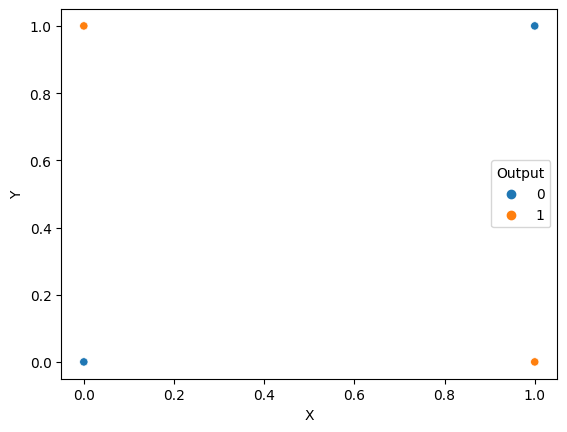

In [18]:
sns.scatterplot(data = df, hue='Output', x=df['X'], y=df['Y'])